In [1]:
%matplotlib inline 
import pandas as pd
import numpy as np

import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
df = pd.read_csv(r'C:\Users\George\Desktop\football-match-prediction\feature-enginnering\seria-A.csv')

In [3]:
df.describe().transpose()

,count,mean,std,min,25%,50%,75%,max
Unnamed: 0,3800.0,1899.500000,1097.109840,0.00,949.750000,1899.500000,2849.250000,3799.00
FTHG,3800.0,1.535263,1.266873,0.00,1.000000,1.000000,2.000000,7.00
FTAG,3800.0,1.255000,1.165656,0.00,0.000000,1.000000,2.000000,7.00
HS,3800.0,13.469737,5.445524,0.00,10.000000,13.000000,17.000000,46.00
AS,3800.0,11.182895,4.696077,0.00,8.000000,11.000000,14.000000,31.00
HST,3800.0,5.157632,2.733999,0.00,3.000000,5.000000,7.000000,18.00
AST,3800.0,4.262105,2.474771,0.00,2.000000,4.000000,6.000000,16.00
HC,3800.0,5.685000,3.069260,0.00,3.000000,5.000000,7.000000,20.00
AC,3800.0,4.652895,2.710628,0.00,3.000000,4.000000,6.000000,19.00
HF,3800.0,13.978421,4.221750,0.00,11.000000,14.000000,17.000000,29.00


First we are going to check some overall features of the league.

Text(0, 0.5, 'Total Goals')

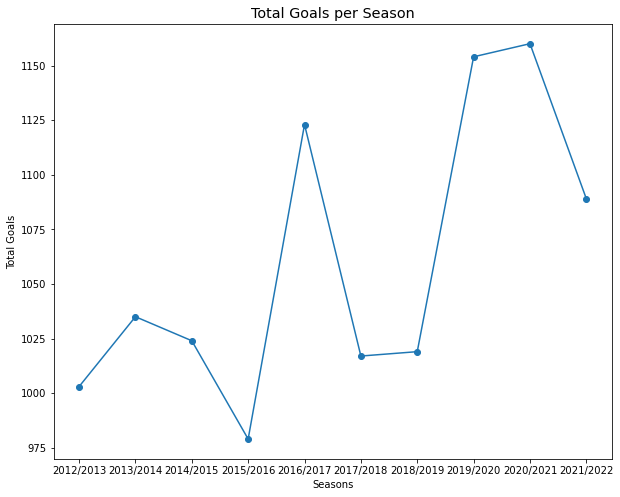

In [4]:
plt.figure(figsize=(10,8))

plt.plot(df['season'].unique(), df.groupby('season')['FTHG'].sum()+df.groupby('season')['FTAG'].sum(), marker = 'o')

plt.style.use('bmh')
plt.title('Total Goals per Season')
plt.xlabel('Seasons')
plt.ylabel('Total Goals')

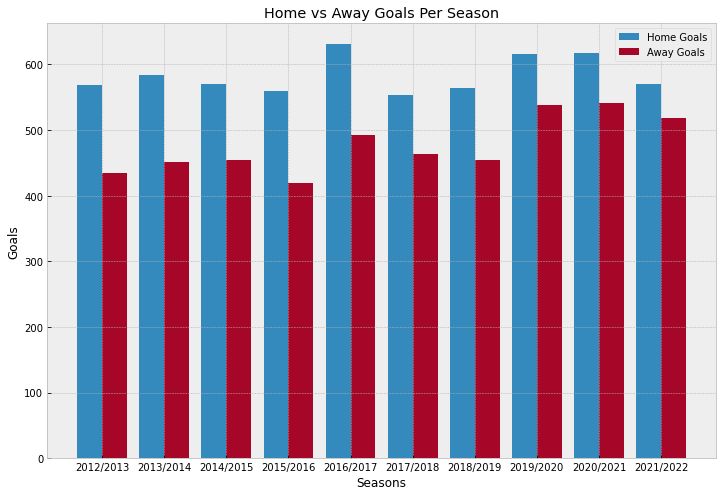

In [5]:
plt.figure(figsize=(12,8))

X_label = df['season'].unique()
X_axis = np.arange(len(df['season'].unique()))

plt.bar(X_axis - 0.2, df.groupby('season')['FTHG'].sum(),0.4, label = 'Home Goals')
plt.bar(X_axis + 0.2, df.groupby('season')['FTAG'].sum(),0.4, label = 'Away Goals')

plt.style.use('bmh')
plt.xticks(X_axis, X_label)
plt.title('Home vs Away Goals Per Season')
plt.xlabel('Seasons')
plt.ylabel('Goals')

plt.legend()

We can see that the total number of goals that the teams achieve at home turf , is every season higher than the
total number of goals the teams achieve at away turf.

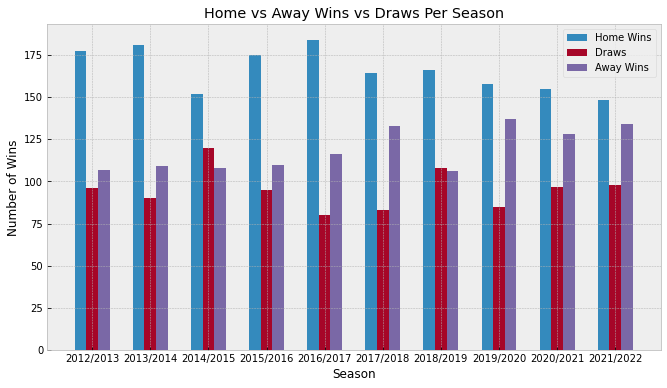

In [6]:
plt.figure(figsize=(11,6))

X_label = df['season'].unique()
X_axis = np.arange(len(df['season'].unique()))

plt.bar(X_axis - 0.2, df.groupby('season')['FTR'].apply(lambda x: (x == 'H').sum()),0.2, label = 'Home Wins')
plt.bar(X_axis, df.groupby('season')['FTR'].apply(lambda x: (x == 'D').sum()),0.2, label = 'Draws')
plt.bar(X_axis + 0.2, df.groupby('season')['FTR'].apply(lambda x: (x == 'A').sum()),0.2, label = 'Away Wins')

plt.style.use('bmh')
plt.xticks(X_axis, X_label)
plt.title('Home vs Away Wins vs Draws Per Season')
plt.xlabel('Season')
plt.ylabel('Number of Wins')

plt.legend()

The number of home wins are always higher that the number of away wins and the number of draws. It is something that we have anticipitated cause teams that are playing at home turf has an advantage cause of their fans.

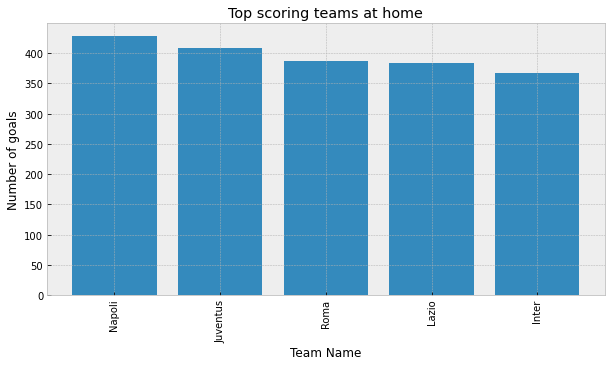

In [7]:
X_label = df.groupby('HomeTeam')['FTHG'].sum().sort_values(ascending=False).head(5).index

plt.figure(figsize=(10,5))

plt.bar(range(5),df.groupby('HomeTeam')['FTHG'].sum().sort_values(ascending=False).head(5))

plt.style.use('bmh')
plt.xticks(np.arange(5),X_label, rotation = 'vertical')
plt.xlabel('Team Name')
plt.ylabel('Number of goals')
plt.title('Top scoring teams at home')

plt.show()

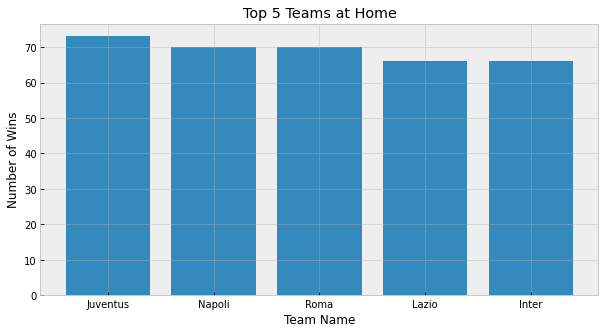

In [8]:
X_label = df.groupby('HomeTeam')['FTR'].apply(lambda x: (x == 'H').sum()).sort_values(ascending=False).head(5).index

plt.figure(figsize=(10,5))

plt.bar(range(5),df.groupby('HomeTeam')['FTR'].apply(lambda x: (x == 'A').sum()).sort_values(ascending=False).head(5))

plt.style.use('bmh')
plt.xticks(np.arange(5),X_label)
plt.title('Top 5 Teams at Home')
plt.xlabel('Team Name')
plt.ylabel('Number of Wins')

plt.show()

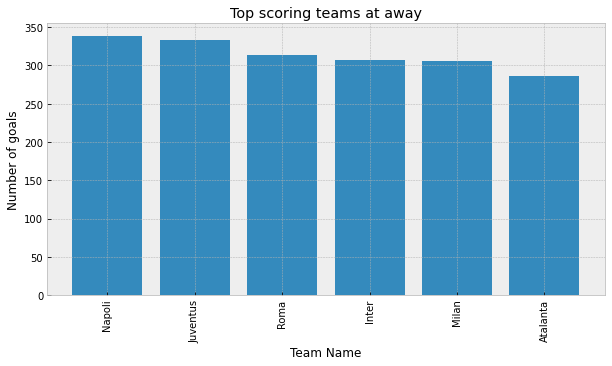

In [9]:
X_label = df.groupby('AwayTeam')['FTAG'].sum().sort_values(ascending=False).head(6).index

plt.figure(figsize=(10,5))

plt.bar(range(6),df.groupby('AwayTeam')['FTAG'].sum().sort_values(ascending=False).head(6))

plt.style.use('bmh')
plt.xticks(np.arange(6),X_label, rotation = 'vertical')
plt.xlabel('Team Name')
plt.ylabel('Number of goals')
plt.title('Top scoring teams at away')

plt.show()

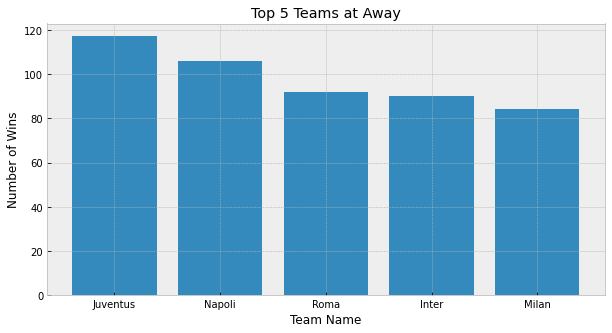

In [10]:
X_label = df.groupby('AwayTeam')['FTR'].apply(lambda x: (x == 'A').sum()).sort_values(ascending=False).head(5).index

plt.figure(figsize=(10,5))

plt.bar(range(5),df.groupby('AwayTeam')['FTR'].apply(lambda x: (x == 'A').sum()).sort_values(ascending=False).head(5))

plt.style.use('bmh')
plt.xticks(np.arange(5),X_label)
plt.title('Top 5 Teams at Away')
plt.xlabel('Team Name')
plt.ylabel('Number of Wins')

plt.show()

First we are going to check the attacking strength.

In [11]:
team_home_scored = df.groupby(['season','HomeTeam'])['FTHG'].sum()
team_home_scored = team_home_scored.rename_axis(['Season','Team Name'])

team_away_scored = df.groupby(['season','AwayTeam'])['FTAG'].sum()
team_away_scored = team_away_scored.rename_axis(['Season','Team Name'])


team_goals_scored = team_home_scored + team_away_scored

best_goalscoring_team = team_goals_scored.loc[team_goals_scored.groupby(level=0).idxmax()]

best_goalscoring_team

Season     Team Name
2012/2013  Napoli       73.0
2013/2014  Juventus     80.0
2014/2015  Juventus     72.0
2015/2016  Roma         83.0
2016/2017  Napoli       94.0
2017/2018  Lazio        89.0
2018/2019  Atalanta     77.0
2019/2020  Atalanta     98.0
2020/2021  Atalanta     90.0
2021/2022  Inter        84.0
dtype: float64

Only two times the team who scored the most goals won the championship.

In [12]:
team_home_conceded = df.groupby(['season','HomeTeam'])['FTAG'].sum()
team_home_conceded = team_home_conceded.rename_axis(['Season','Team Name'])

team_away_conceded = df.groupby(['season','AwayTeam'])['FTHG'].sum()
team_away_conceded = team_away_conceded.rename_axis(['Season','Team Name'])

#Number of goals each team conceded per season
team_goal_conceded = team_home_conceded + team_away_conceded

best_team_at_defense = team_goal_conceded.loc[team_goal_conceded.groupby(level=0).idxmin()]
best_team_at_defense

Season     Team Name
2012/2013  Juventus     24.0
2013/2014  Juventus     23.0
2014/2015  Juventus     24.0
2015/2016  Juventus     20.0
2016/2017  Juventus     27.0
2017/2018  Juventus     24.0
2018/2019  Juventus     30.0
2019/2020  Inter        36.0
2020/2021  Inter        35.0
2021/2022  Milan        31.0
dtype: float64

9 out of 10 times the team with the best defense won the championship

In [13]:
overall_stats = team_goals_scored - team_goal_conceded
best_overall_stats = overall_stats.loc[overall_stats.groupby(level=0).idxmax()]
best_overall_stats

Season     Team Name
2012/2013  Juventus     47.0
2013/2014  Juventus     57.0
2014/2015  Juventus     48.0
2015/2016  Juventus     55.0
2016/2017  Napoli       55.0
2017/2018  Juventus     62.0
2018/2019  Juventus     40.0
2019/2020  Atalanta     50.0
2020/2021  Inter        54.0
2021/2022  Inter        52.0
dtype: float64

<AxesSubplot:xlabel='FTR', ylabel='count'>

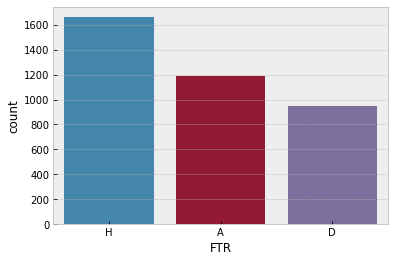

In [14]:
sns.countplot(x='FTR', data=df)

The number of home wins is much greater than that of the away wins and the draws. That probably has to do with the crowd attendance that gives a boost at home teams. Our data also indicates that we may have a difficulty to predict the draws.

<AxesSubplot:>

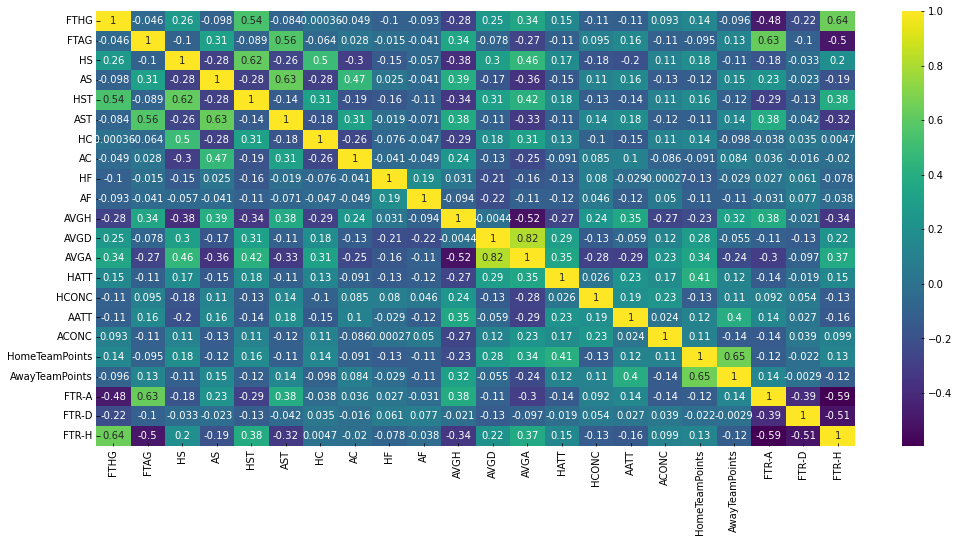

In [15]:
plt.figure(figsize=(17,8))
sns.heatmap(df.drop(['Date', 'HomeTeam', 'AwayTeam', 'Unnamed: 0'],axis=1).corr(),annot=True, cmap='viridis')

<function matplotlib.pyplot.show(close=None, block=None)>

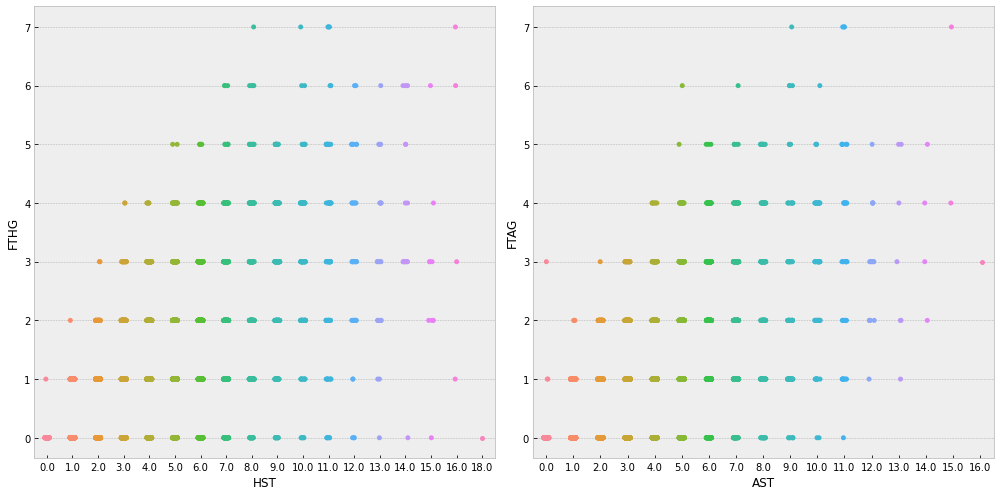

In [32]:
f, axes = plt.subplots(1, 2)
plt.rcParams["figure.figsize"] = [14.00, 7.00]
plt.rcParams["figure.autolayout"] = True

sns.stripplot(x='HST', y='FTHG', data=df, jitter=True,ax = axes[0])
sns.stripplot(x='AST', y='FTAG', data=df, jitter=True,ax=axes[1])

plt.show

We can see that as the number of shots on target for every team is getting higher, it is more possible to score a goal which is the main factor that affect the game result. Maybe a feature like the average of shots on target from match to match would be a good choice.

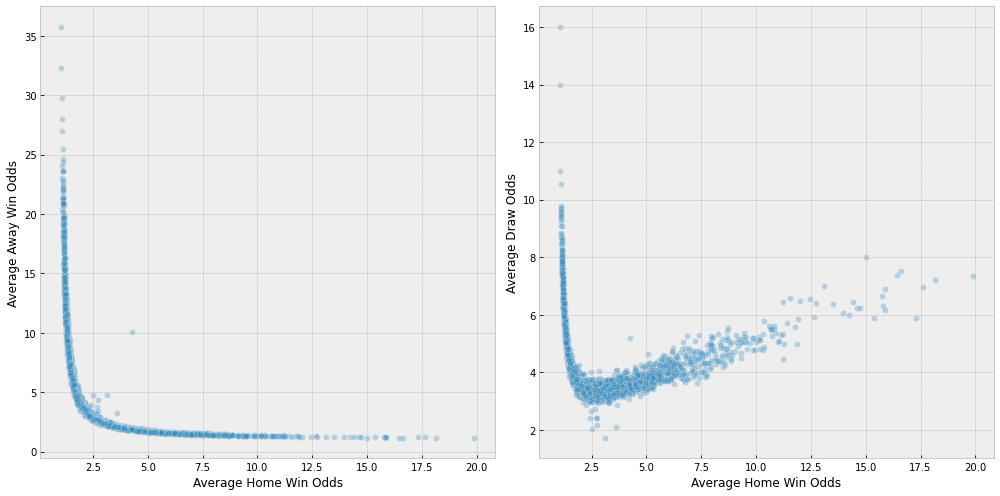

In [17]:
f, axes = plt.subplots(1, 2)
plt.rcParams["figure.figsize"] = [14.00, 6.00]
plt.rcParams["figure.autolayout"] = True

sns.scatterplot(x='AVGH', y='AVGA', data=df, alpha=0.3, ax=axes[0])
axes[0].set_xlabel('Average Home Win Odds')
axes[0].set_ylabel('Average Away Win Odds')

sns.scatterplot(x='AVGH', y='AVGD', data=df, alpha=0.3, ax=axes[1])
axes[1].set_xlabel('Average Home Win Odds')
axes[1].set_ylabel('Average Draw Odds')

plt.show()

Text(0, 0.5, 'Average Draw Win Odds')

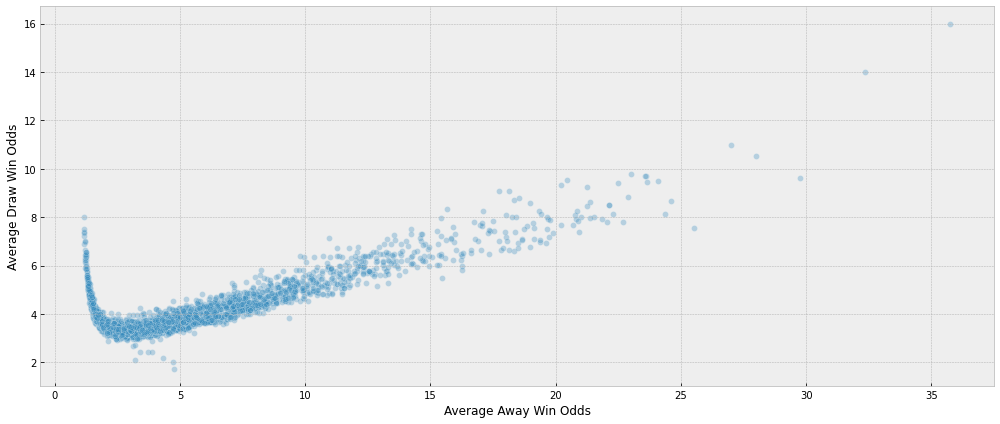

In [18]:
sns.scatterplot(x='AVGA', y='AVGD', data=df, alpha=0.3)
plt.xlabel("Average Away Win Odds")
plt.ylabel("Average Draw Win Odds")

As the price of the home win odd is getting lower the price of the away win odd is getting higher and vice versa. That has to do with the favorite to win the game.
When it comes to draw odd it is reasonable to take higher values as the differention of home and and away win odds is getting higher.

<function matplotlib.pyplot.show(close=None, block=None)>

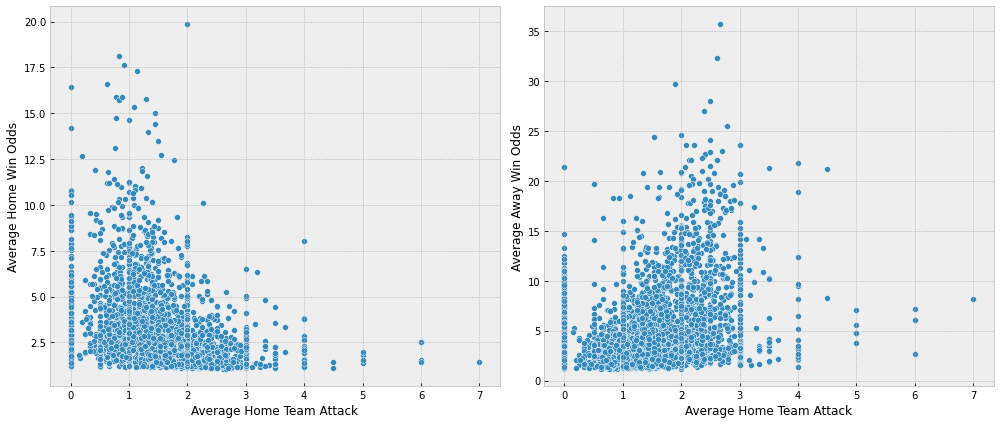

In [19]:
f, axes = plt.subplots(1, 2)
plt.rcParams["figure.figsize"] = [14.00, 7.00]
plt.rcParams["figure.autolayout"] = True

sns.scatterplot(x='HATT', y='AVGH', data=df,ax = axes[0])
axes[0].set_xlabel('Average Home Team Attack')
axes[0].set_ylabel('Average Home Win Odds')

sns.scatterplot(x='HATT', y='AVGA', data=df,ax=axes[1])
axes[1].set_xlabel('Average Home Team Attack')
axes[1].set_ylabel('Average Away Win Odds')

plt.show

We can see that as the home team attack is getting better, the home win odds are getting lower and the away win odds are getting higher. That is something that we have expected to happen, since the better stats the home team has the stronger it is. The points that have big deviation probably are after 2 or 3 matches from the beginning of the championship.

<function matplotlib.pyplot.show(close=None, block=None)>

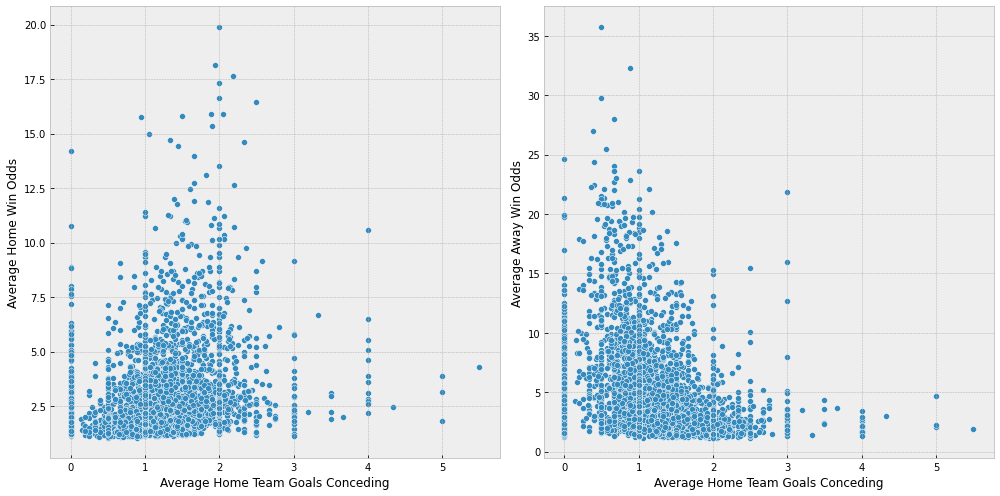

In [20]:
f, axes = plt.subplots(1, 2)
plt.rcParams["figure.figsize"] = [14.00, 7.00]
plt.rcParams["figure.autolayout"] = True

sns.scatterplot(x='HCONC', y='AVGH', data=df,ax = axes[0])
axes[0].set_xlabel('Average Home Team Goals Conceding')
axes[0].set_ylabel('Average Home Win Odds')

sns.scatterplot(x='HCONC', y='AVGA', data=df,ax=axes[1])
axes[1].set_xlabel('Average Home Team Goals Conceding')
axes[1].set_ylabel('Average Away Win Odds')

plt.show

We can see that when the home team doesn't concede a lot of goals the home win odds usually have lower price and the away win odds have high price. That is something that we have expected to happen, since the better stats the home team has the stronger it is. The points that have big deviation probably are after 2 or 3 matches from the beginning of the championship.

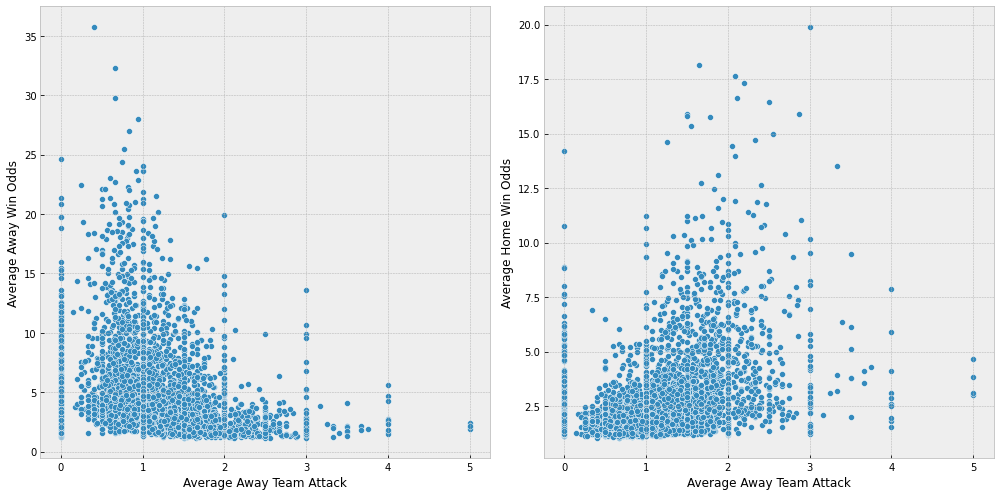

In [35]:
f, axes = plt.subplots(1, 2)
plt.rcParams["figure.figsize"] = [14.00, 7.00]
plt.rcParams["figure.autolayout"] = True

sns.scatterplot(x='AATT', y='AVGA', data=df,ax = axes[0])
axes[0].set_xlabel('Average Away Team Attack')
axes[0].set_ylabel('Average Away Win Odds')

sns.scatterplot(x='AATT', y='AVGH', data=df,ax=axes[1])
axes[1].set_xlabel('Average Away Team Attack')
axes[1].set_ylabel('Average Home Win Odds')

plt.show()

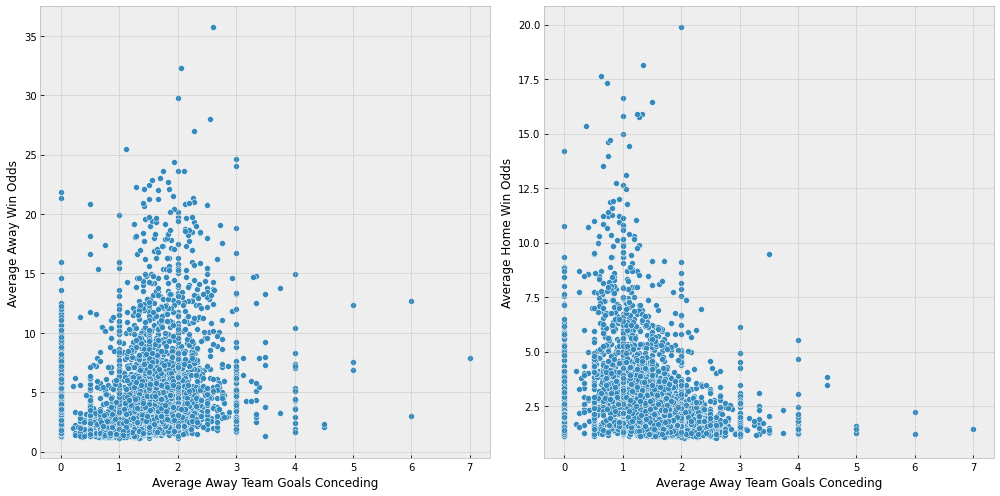

In [34]:
f, axes = plt.subplots(1, 2)
plt.rcParams["figure.figsize"] = [14.00, 7.00]
plt.rcParams["figure.autolayout"] = True

sns.scatterplot(x='ACONC', y='AVGA', data=df,ax = axes[0])
axes[0].set_xlabel('Average Away Team Goals Conceding')
axes[0].set_ylabel('Average Away Win Odds')

sns.scatterplot(x='ACONC', y='AVGH', data=df,ax=axes[1])
axes[1].set_xlabel('Average Away Team Goals Conceding')
axes[1].set_ylabel('Average Home Win Odds')

plt.show()

As we expected the away performance stats of the teams has the same behaviour when it comes to winning odds.

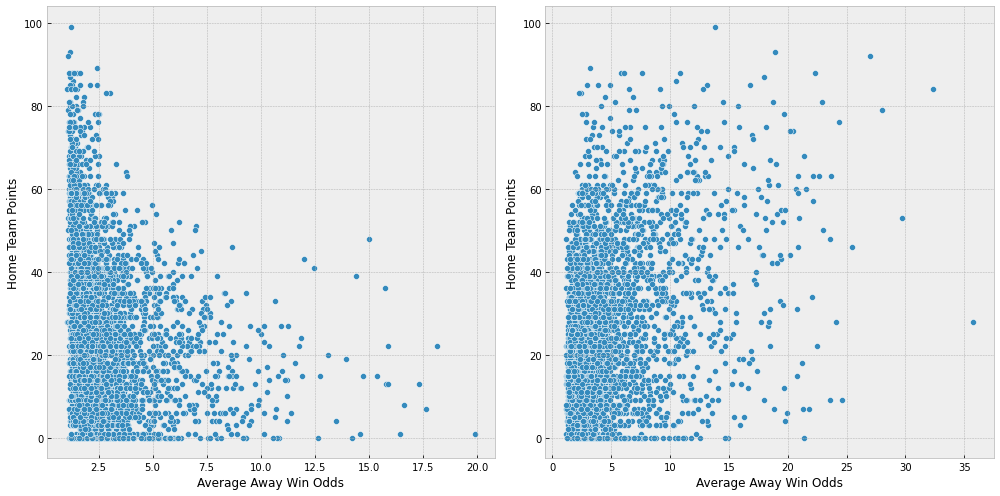

In [41]:
f, axes = plt.subplots(1, 2)
plt.rcParams["figure.figsize"] = [14.00, 7.00]
plt.rcParams["figure.autolayout"] = True

sns.scatterplot(x='AVGH', y='HomeTeamPoints', data=df, ax = axes[0])
axes[0].set_xlabel('Average Away Win Odds')
axes[0].set_ylabel('Home Team Points')

sns.scatterplot(x='AVGA', y='HomeTeamPoints', data=df, ax=axes[1])
axes[1].set_xlabel('Average Away Win Odds')
axes[1].set_ylabel('Home Team Points')

plt.show()

Text(0, 0.5, 'Average Draw Win Odds')

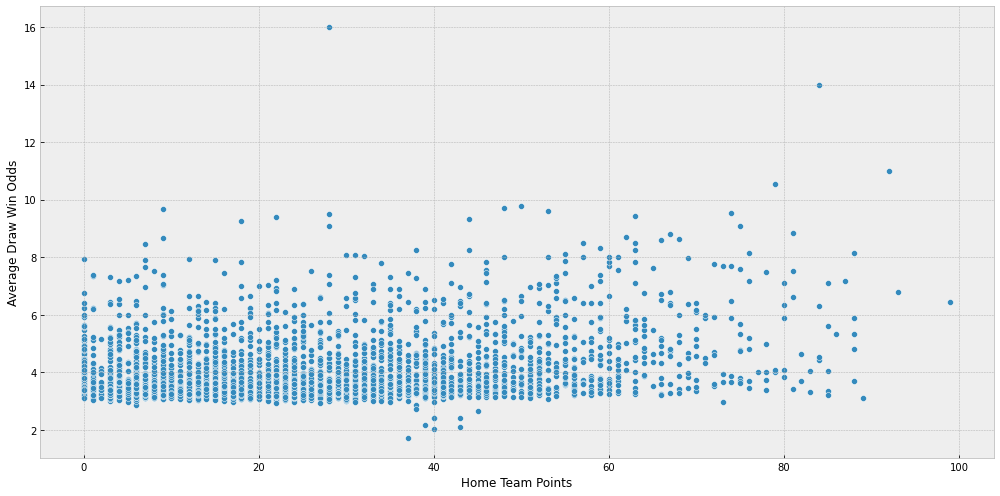

In [43]:
sns.scatterplot(x='HomeTeamPoints', y='AVGD', data=df)
plt.xlabel("Home Team Points")
plt.ylabel("Average Draw Win Odds")

The points that the home team has during the season affects the prices of the odds. Big number of points indicates that the team is strong, so the chaches for this team to win is high. As a cosnsequence the home win odd is getting lower and the other two are raising.

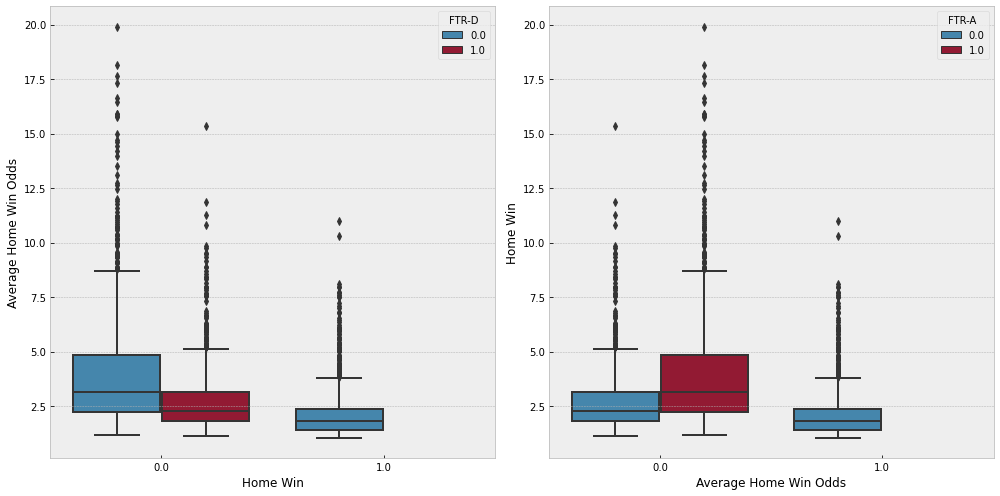

In [33]:
f, axes = plt.subplots(1, 2)
plt.rcParams["figure.figsize"] = [14.00, 7.00]
plt.rcParams["figure.autolayout"] = True

sns.boxplot(x='FTR-H', y='AVGH', data=df, hue='FTR-D',ax = axes[0])
axes[0].set_xlabel('Home Win')
axes[0].set_ylabel('Average Home Win Odds')

sns.boxplot(x='FTR-H', y='AVGH', data=df, hue='FTR-A', ax=axes[1])
axes[1].set_xlabel('Average Home Win Odds')
axes[1].set_ylabel('Home Win')

plt.show()

We can see that low values of home win odds doesn't necessary mean that the home team is going to win. There are high chances that the away team is going to win the game, or at least achieve a draw. So having the home win odds as the main betting strategy probably is going to lead you at losses.